Lectura de la variable **Endeudamiento**, análisis y preprocesado

In [17]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import KNNImputer
#from tabulate import tabulate


In [18]:
ruta="../../data/"
ficheroLectura=ruta+"endeudamiento.csv"
ficheroEscritura=ruta+"endeudamientoProcesado.csv"
patronColumnas="Endeudamiento"

In [19]:
#Lectura del csv donde se encuentran los datos de la variable por años
#Se comprueba que no hay valores de ID de empresa duplicados

dfOriginal = pd.read_csv(ficheroLectura, decimal=',', dtype=float)
df = dfOriginal.filter(like=patronColumnas)
duplicados = dfOriginal['ID'].duplicated().any()
print(f"La columna ID tiene valores duplicados: {duplicados}")
print(f"Numero de filas: {len(df)}")
print(df.head())


La columna ID tiene valores duplicados: False
Numero de filas: 12266
   Endeudamiento2011  Endeudamiento2012  Endeudamiento2013  Endeudamiento2014  \
0           1.497714           1.805413           1.812718           0.616049   
1           0.674539           0.437875           0.323038           0.301514   
2          64.512285         -25.033164          14.821323         -31.707076   
3           0.497749           0.479036           0.499845           0.632487   
4           0.453965           0.393829           0.396751           0.341672   

   Endeudamiento2015  Endeudamiento2016  Endeudamiento2017  Endeudamiento2018  \
0           0.381481           0.897250           0.735071           0.645256   
1           0.382459           0.458029           0.380762           0.398197   
2           0.138346           0.058084           0.124037           0.072904   
3           1.050607           0.938815           0.936978           0.877956   
4           0.315935           0.677188

In [20]:
#se añade la columna del año faltante con valores nan

df.insert(loc=0, column='Endeudamiento2010', value=np.nan)
df

,Endeudamiento2010,Endeudamiento2011,Endeudamiento2012,Endeudamiento2013,Endeudamiento2014,Endeudamiento2015,Endeudamiento2016,Endeudamiento2017,Endeudamiento2018,Endeudamiento2019,Endeudamiento2020,Endeudamiento2021,Endeudamiento2022
0,NaN,1.497714,1.805413,1.812718,0.616049,0.381481,0.897250,0.735071,0.645256,0.931896,1.328598e+00,2.135006,1.792480
1,NaN,0.674539,0.437875,0.323038,0.301514,0.382459,0.458029,0.380762,0.398197,0.315445,3.336110e-01,0.478991,0.551334
2,NaN,64.512285,-25.033164,14.821323,-31.707076,0.138346,0.058084,0.124037,0.072904,0.067194,5.746323e-02,0.060012,0.076107
3,NaN,0.497749,0.479036,0.499845,0.632487,1.050607,0.938815,0.936978,0.877956,0.897864,8.569157e-01,1.453307,2.411922
4,NaN,0.453965,0.393829,0.396751,0.341672,0.315935,0.677188,0.638931,0.692185,0.857170,7.341419e-01,0.982234,1.705139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12261,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027483,0.046599,0.036590,2.513117e-02,0.257276,3.163352
12262,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.608606,4.688071,2.754646,3.268979e+00,3.297692,0.626763
12263,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.184961,4.435060,3.844078,4.972288e+07,11.998557,12.809369
12264,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.471261,0.688955,0.276490,0.189579,1.769916e-01,0.069320,0.296789


In [21]:
# Contar valores nulos por columna
# Consideramos tanto los NaN como los 0 como valores faltantes para este cálculo

df.replace(0, np.nan, inplace=True)
porcentajeFaltantes = (df.isnull()).mean() * 100

print(porcentajeFaltantes)

# Percentiles, media y mediana por columna
print(df.describe())


"""
# Aplicar la función a cada fila
df = df.apply(detectarOutliers, axis=1)
"""

# Calcula el IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limiteInferior = Q1 - 10 * IQR
limiteSuperior = Q3 + 10 * IQR

# Imprime los umbrales
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Umbrales para {col}: Límite Inferior = {limiteInferior[col]}, Límite Superior = {limiteSuperior[col]}")

# Considerar como outlier aquellos valores que están fuera del rango de Q1 - 1.5*IQR y Q3 + 1.5*IQR
print("Numero de outliers por año")
outliers = ((df < (limiteInferior)) | (df > (limiteSuperior))).sum()


# Mostrar el resultado
print(outliers)

# Agrupar las filas por numero de nan
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print(nanRow)

Endeudamiento2010    100.000000
Endeudamiento2011     21.881624
Endeudamiento2012     19.117887
Endeudamiento2013     13.712702
Endeudamiento2014      9.766835
Endeudamiento2015      7.590086
Endeudamiento2016      3.807272
Endeudamiento2017      0.008153
Endeudamiento2018      0.000000
Endeudamiento2019      0.000000
Endeudamiento2020      6.766672
Endeudamiento2021      4.214903
Endeudamiento2022      7.296592
dtype: float64
       Endeudamiento2010  Endeudamiento2011  Endeudamiento2012  \
count                0.0        9582.000000        9921.000000   
mean                 NaN           4.657637           3.459036   
std                  NaN         138.580317         127.898861   
min                  NaN       -1512.621901       -3558.875778   
25%                  NaN           0.478181           0.429612   
50%                  NaN           1.064550           1.016290   
75%                  NaN           2.229151           2.117647   
max                  NaN       12012.5902

In [22]:

df = df.where((df >= limiteInferior) & (df <= limiteSuperior), np.nan)
#df.dtypes

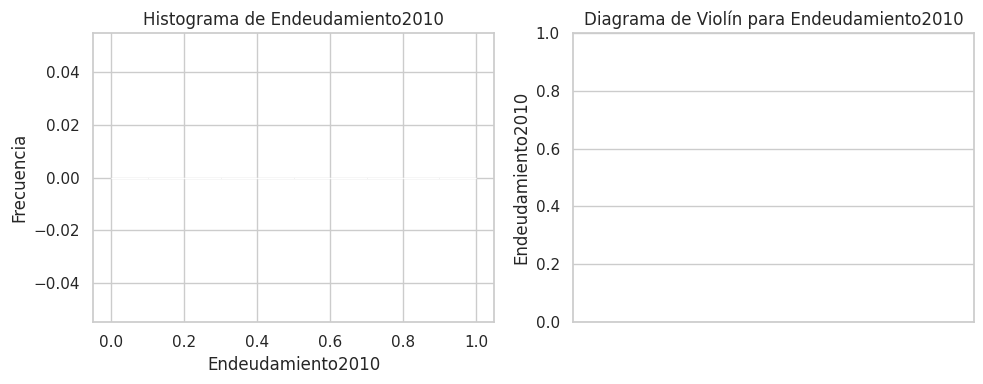

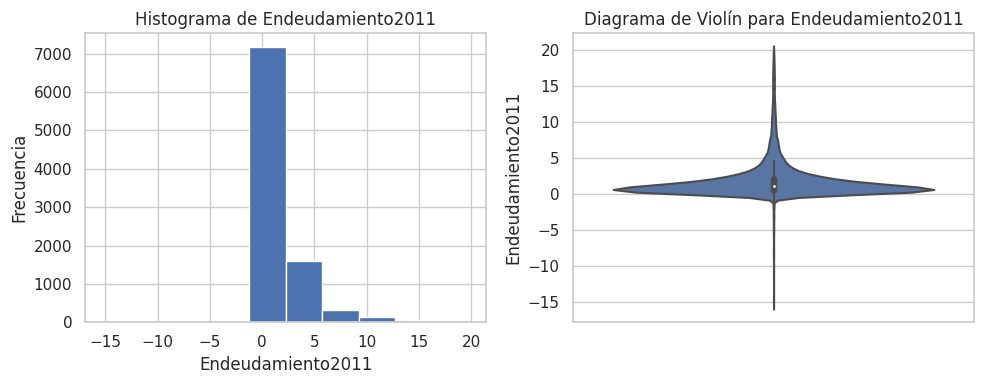

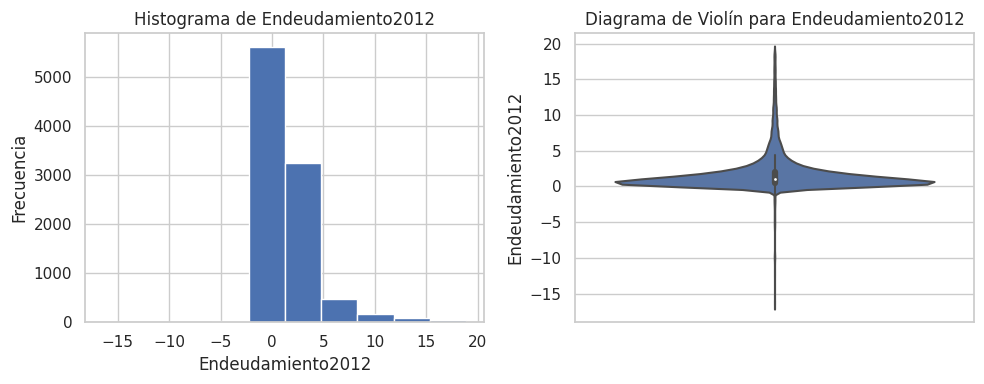

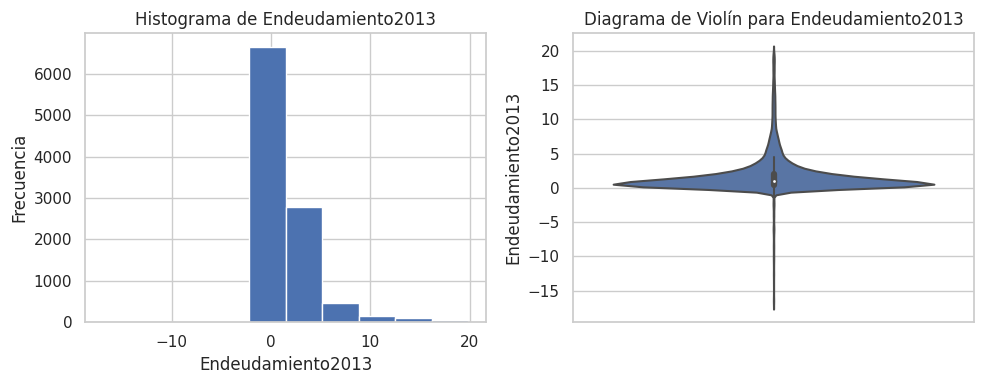

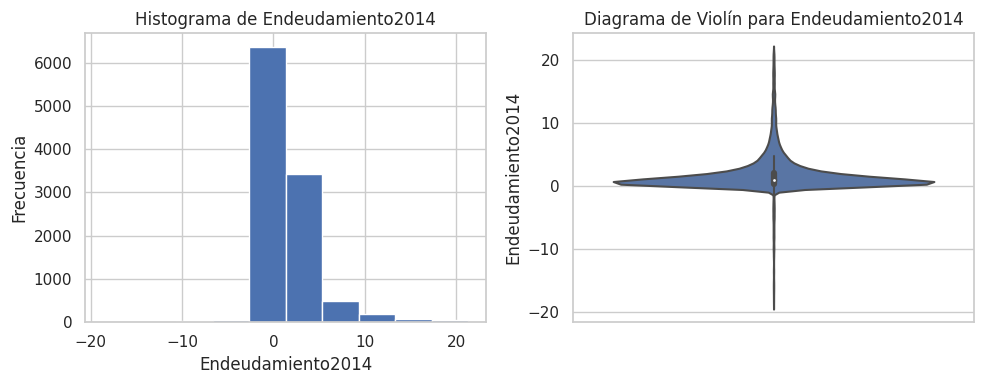

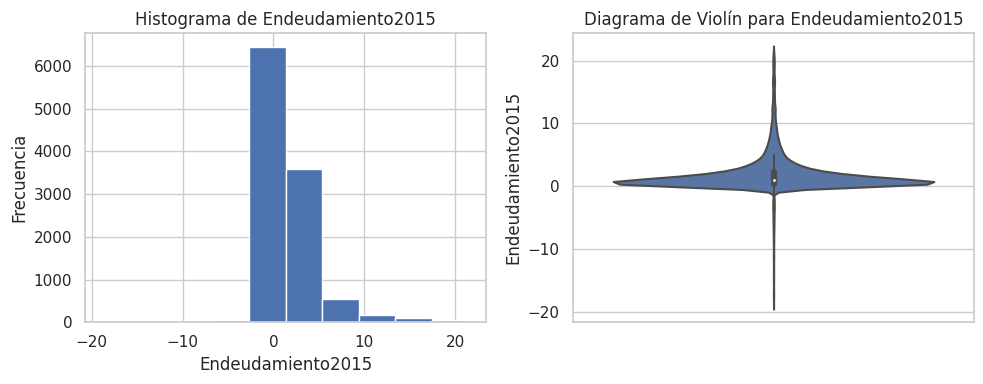

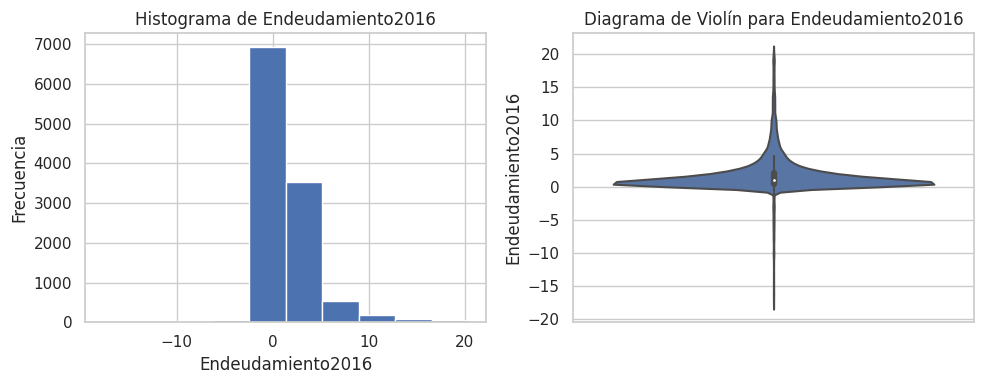

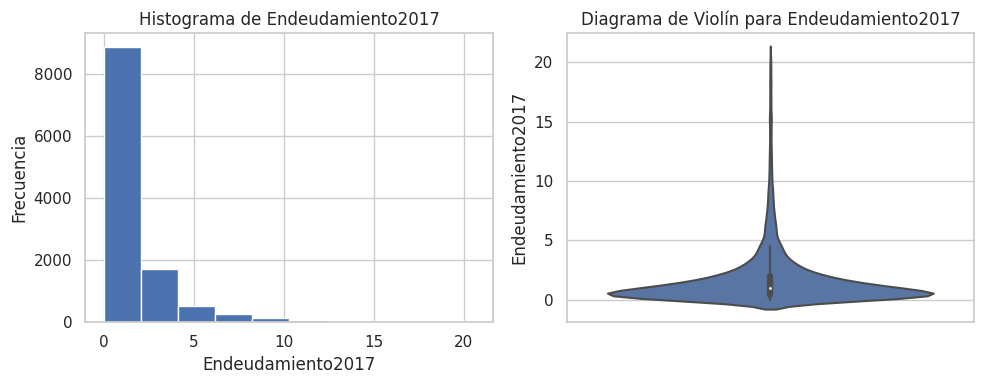

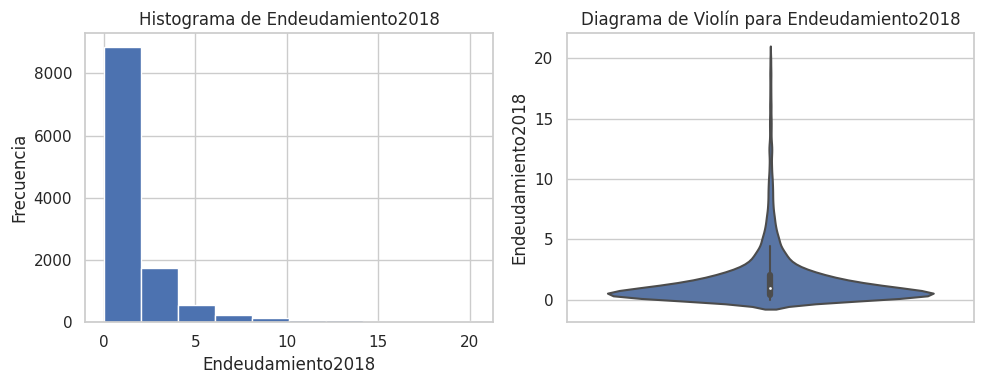

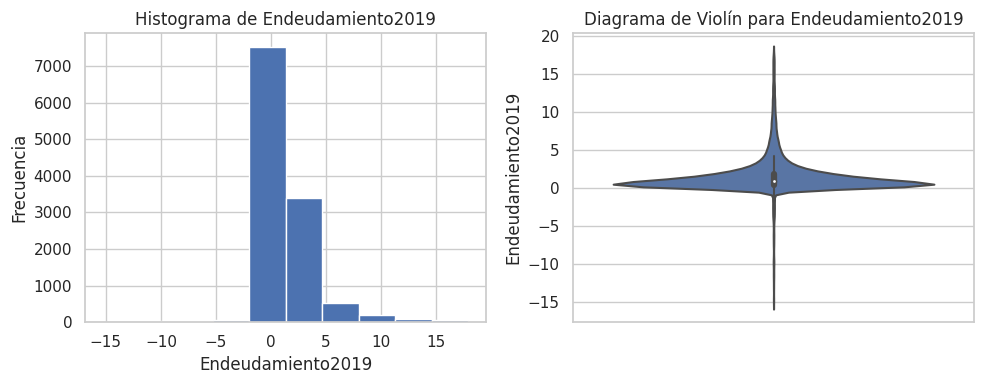

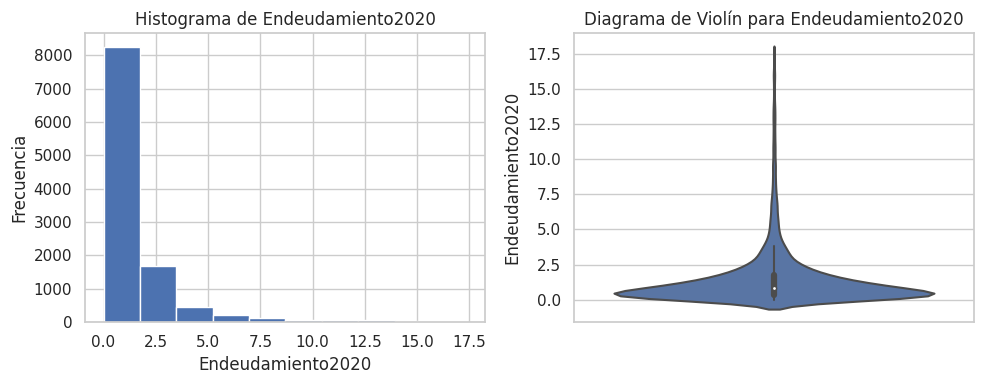

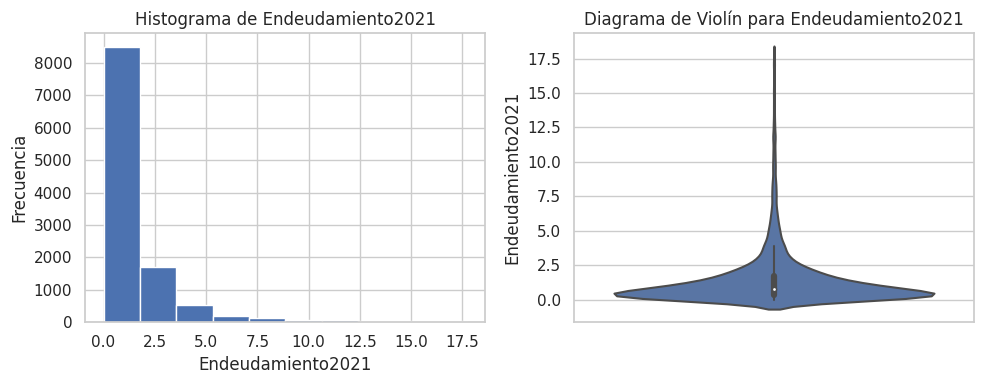

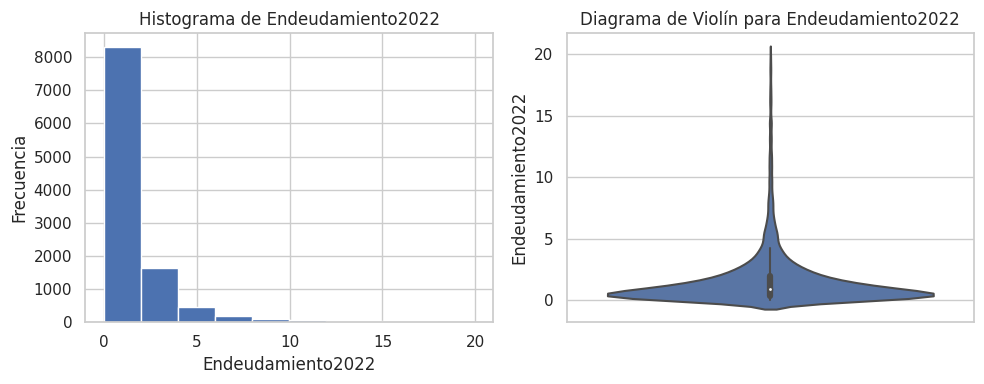

In [23]:
sns.set(style="whitegrid")

# Generar histogramas y diagramas de violín para cada columna
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    # Histograma
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    df[columna].hist()
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Diagrama de violín
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.violinplot(data=df, y=columna)
    plt.title(f'Diagrama de Violín para {columna}')

    plt.tight_layout()
    plt.show()

In [24]:
# Agrupar las filas por numero de nan
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print(nanRow)
print (len(df))

# Calcular el número mínimo de valores NO nulos para no ser eliminado

umbralNulos = len(df.columns) - 7

# Eliminar filas que tienen más de 7 valores NaN
#df = df.dropna(thresh=umbralNulos)


print("Número de nulos despues de limpiar")

# Agrupar las filas por numero de nan
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()


# Mostrar el resultado
print(nanRow)
print (len(df))

1     7371
2     1461
3      889
4      751
5      574
6      465
7      284
8      169
9      112
10      63
11      48
12      50
13      29
dtype: int64
12266
Número de nulos despues de limpiar
1     7371
2     1461
3      889
4      751
5      574
6      465
7      284
8      169
9      112
10      63
11      48
12      50
13      29
dtype: int64
12266


In [25]:
df.head(20)

,Endeudamiento2010,Endeudamiento2011,Endeudamiento2012,Endeudamiento2013,Endeudamiento2014,Endeudamiento2015,Endeudamiento2016,Endeudamiento2017,Endeudamiento2018,Endeudamiento2019,Endeudamiento2020,Endeudamiento2021,Endeudamiento2022
0,NaN,1.497714,1.805413,1.812718,0.616049,0.381481,0.897250,0.735071,0.645256,0.931896,1.328598,2.135006,1.792480
1,NaN,0.674539,0.437875,0.323038,0.301514,0.382459,0.458029,0.380762,0.398197,0.315445,0.333611,0.478991,0.551334
2,NaN,NaN,NaN,14.821323,NaN,0.138346,0.058084,0.124037,0.072904,0.067194,0.057463,0.060012,0.076107
3,NaN,0.497749,0.479036,0.499845,0.632487,1.050607,0.938815,0.936978,0.877956,0.897864,0.856916,1.453307,2.411922
4,NaN,0.453965,0.393829,0.396751,0.341672,0.315935,0.677188,0.638931,0.692185,0.857170,0.734142,0.982234,1.705139
5,NaN,0.268548,0.245559,0.255673,0.222635,0.200915,0.164885,0.158623,0.047627,0.061550,0.062908,0.051936,0.051614
6,NaN,0.101953,0.078306,0.102946,0.146019,0.129303,0.121017,0.142045,0.162578,0.120980,0.255228,0.194715,0.236248
7,NaN,1.630744,0.999197,1.338830,1.281084,2.318335,1.526223,1.539015,1.117898,0.954503,1.457170,1.604618,1.432024
8,NaN,0.322218,0.106185,0.086909,0.251114,0.015992,0.014575,0.064223,0.058765,0.077840,0.127819,0.082193,0.102030
9,NaN,0.360168,0.288028,0.277889,0.213702,0.224824,0.675924,0.765089,0.704304,1.047772,0.847433,0.913975,1.170503


In [26]:
df = df.interpolate(method='linear', axis=1, inplace=False)
df.head(20)

,Endeudamiento2010,Endeudamiento2011,Endeudamiento2012,Endeudamiento2013,Endeudamiento2014,Endeudamiento2015,Endeudamiento2016,Endeudamiento2017,Endeudamiento2018,Endeudamiento2019,Endeudamiento2020,Endeudamiento2021,Endeudamiento2022
0,NaN,1.497714,1.805413,1.812718,0.616049,0.381481,0.897250,0.735071,0.645256,0.931896,1.328598,2.135006,1.792480
1,NaN,0.674539,0.437875,0.323038,0.301514,0.382459,0.458029,0.380762,0.398197,0.315445,0.333611,0.478991,0.551334
2,NaN,NaN,NaN,14.821323,7.479834,0.138346,0.058084,0.124037,0.072904,0.067194,0.057463,0.060012,0.076107
3,NaN,0.497749,0.479036,0.499845,0.632487,1.050607,0.938815,0.936978,0.877956,0.897864,0.856916,1.453307,2.411922
4,NaN,0.453965,0.393829,0.396751,0.341672,0.315935,0.677188,0.638931,0.692185,0.857170,0.734142,0.982234,1.705139
5,NaN,0.268548,0.245559,0.255673,0.222635,0.200915,0.164885,0.158623,0.047627,0.061550,0.062908,0.051936,0.051614
6,NaN,0.101953,0.078306,0.102946,0.146019,0.129303,0.121017,0.142045,0.162578,0.120980,0.255228,0.194715,0.236248
7,NaN,1.630744,0.999197,1.338830,1.281084,2.318335,1.526223,1.539015,1.117898,0.954503,1.457170,1.604618,1.432024
8,NaN,0.322218,0.106185,0.086909,0.251114,0.015992,0.014575,0.064223,0.058765,0.077840,0.127819,0.082193,0.102030
9,NaN,0.360168,0.288028,0.277889,0.213702,0.224824,0.675924,0.765089,0.704304,1.047772,0.847433,0.913975,1.170503


In [27]:
# Después de intentar la interpolación se imputa la media  de los valores de una fila  a los na consecutivos que resten
df = df.apply(lambda row: row.fillna(row.mean()), axis=1)
df.head(20)

,Endeudamiento2010,Endeudamiento2011,Endeudamiento2012,Endeudamiento2013,Endeudamiento2014,Endeudamiento2015,Endeudamiento2016,Endeudamiento2017,Endeudamiento2018,Endeudamiento2019,Endeudamiento2020,Endeudamiento2021,Endeudamiento2022
0,1.214911,1.497714,1.805413,1.812718,0.616049,0.381481,0.897250,0.735071,0.645256,0.931896,1.328598,2.135006,1.792480
1,0.419650,0.674539,0.437875,0.323038,0.301514,0.382459,0.458029,0.380762,0.398197,0.315445,0.333611,0.478991,0.551334
2,2.295530,2.295530,2.295530,14.821323,7.479834,0.138346,0.058084,0.124037,0.072904,0.067194,0.057463,0.060012,0.076107
3,0.961123,0.497749,0.479036,0.499845,0.632487,1.050607,0.938815,0.936978,0.877956,0.897864,0.856916,1.453307,2.411922
4,0.682428,0.453965,0.393829,0.396751,0.341672,0.315935,0.677188,0.638931,0.692185,0.857170,0.734142,0.982234,1.705139
5,0.149373,0.268548,0.245559,0.255673,0.222635,0.200915,0.164885,0.158623,0.047627,0.061550,0.062908,0.051936,0.051614
6,0.149278,0.101953,0.078306,0.102946,0.146019,0.129303,0.121017,0.142045,0.162578,0.120980,0.255228,0.194715,0.236248
7,1.433303,1.630744,0.999197,1.338830,1.281084,2.318335,1.526223,1.539015,1.117898,0.954503,1.457170,1.604618,1.432024
8,0.109155,0.322218,0.106185,0.086909,0.251114,0.015992,0.014575,0.064223,0.058765,0.077840,0.127819,0.082193,0.102030
9,0.624134,0.360168,0.288028,0.277889,0.213702,0.224824,0.675924,0.765089,0.704304,1.047772,0.847433,0.913975,1.170503


In [28]:
df.insert(0, "ID", dfOriginal["ID"].copy().astype(int))
df.head()

,ID,Endeudamiento2010,Endeudamiento2011,Endeudamiento2012,Endeudamiento2013,Endeudamiento2014,Endeudamiento2015,Endeudamiento2016,Endeudamiento2017,Endeudamiento2018,Endeudamiento2019,Endeudamiento2020,Endeudamiento2021,Endeudamiento2022
0,233151,1.214911,1.497714,1.805413,1.812718,0.616049,0.381481,0.897250,0.735071,0.645256,0.931896,1.328598,2.135006,1.792480
1,233207,0.419650,0.674539,0.437875,0.323038,0.301514,0.382459,0.458029,0.380762,0.398197,0.315445,0.333611,0.478991,0.551334
2,233235,2.295530,2.295530,2.295530,14.821323,7.479834,0.138346,0.058084,0.124037,0.072904,0.067194,0.057463,0.060012,0.076107
3,233284,0.961123,0.497749,0.479036,0.499845,0.632487,1.050607,0.938815,0.936978,0.877956,0.897864,0.856916,1.453307,2.411922
4,233291,0.682428,0.453965,0.393829,0.396751,0.341672,0.315935,0.677188,0.638931,0.692185,0.857170,0.734142,0.982234,1.705139


In [29]:
df.to_csv(ficheroEscritura, index=False)